In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from matplotlib.lines import Line2D

In [32]:
N =20
# new data 
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/Overlap2023_01_19_22_08_42_L20_1',delimiter=',')
z0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/z_2023_01_19_22_08_42_L20_1',delimiter=',')
zz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/zz_2023_01_19_22_08_42_L20_1',delimiter=',')
zzdata = zz0.reshape(len(z0),N,N)
z0_g = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/zg_2023_01_19_22_08_42_L20_1',delimiter=',')
zz0_g=  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_20_23/zzg_2023_01_19_22_08_42_L20_1',delimiter=',')
zzdata_g = zz0_g.reshape(len(z0_g),N,N)

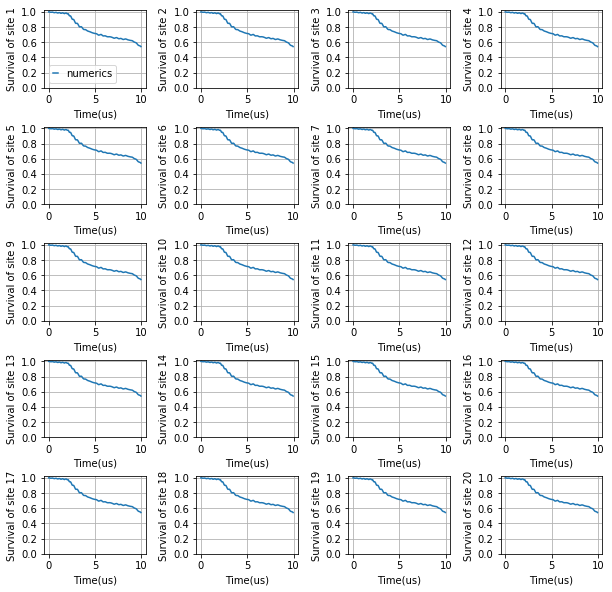

In [3]:
fig,ax = plt.subplots(ncols = 4 ,nrows=5,figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0

for i in range(N):
    n = 1-(z0[:,i]+1)/2
    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='numerics')
    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
plt.show()
#print((standard_deviation**0.5)/N)

In [31]:
crit_det = 1.6
crit_id0 = np.argmin(abs(data[1]-crit_det))
print(crit_id0)
print('crit time(us) = %3f'%data[0,crit_id0])
print('crit detuning(MHz) = %3f'%data[1,crit_id0])
print('Overlap with ground state at critical point = %3f'%data[5,crit_id0])

147
crit time(us) = 8.604000
crit detuning(MHz) = 1.601057
Overlap with ground state at critical point = 0.989637


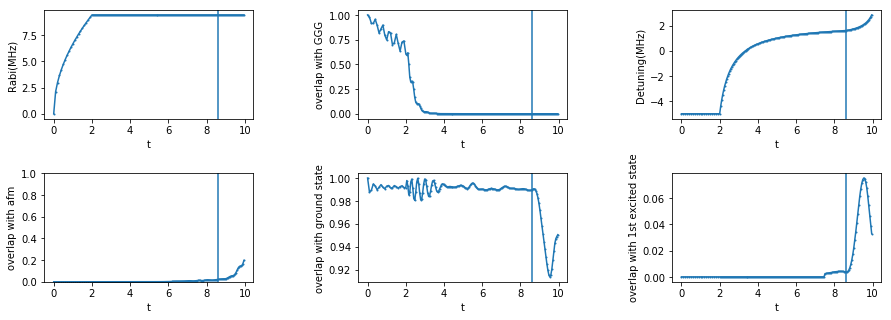

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15,5))
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,2].plot(data[0],data[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data[0],data[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data[0],data[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data[0],data[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data[0],data[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

ax[1,2].plot(data[0],data[7],marker='o',markersize=MS,ls=LS)
ax[1,2].set_xlabel('t')
ax[1,2].set_ylabel('overlap with 1st excited state')
for i in range(6):
    ax[i//3,i%3].axvline(data[0,crit_id0])

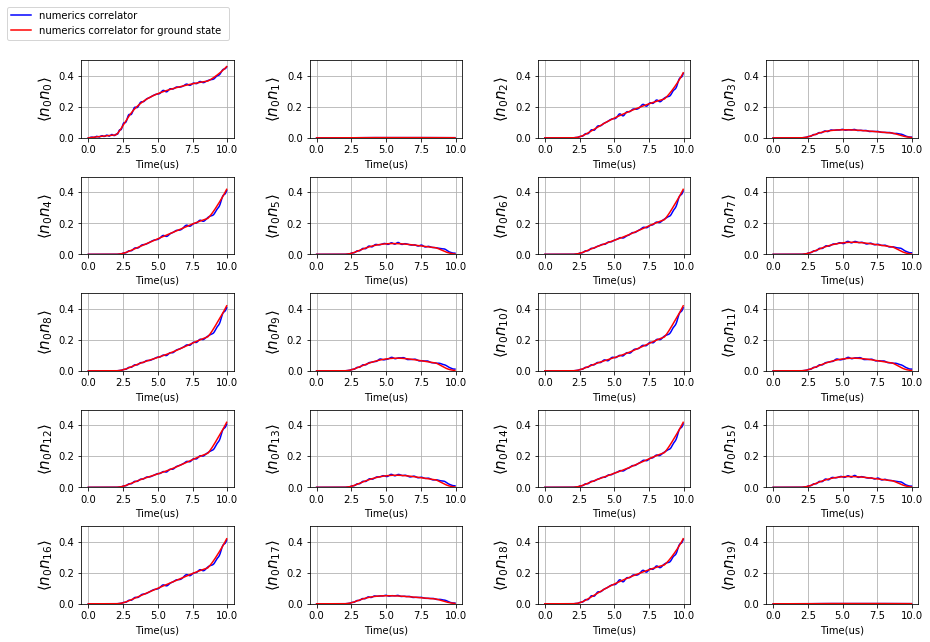

In [12]:
fig,ax = plt.subplots(ncols = 4 ,nrows=5,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
end = 0.5 

for i in range(N):
    n = 1-(z0[:,i]+1)/2  
    ng = 1- (z0_g[:,i]+1)/2 

    j = 0
    nn_sim = (zzdata[:,i,j]+z0[:,i]+z0[:,j]+1)/4
    nn_sim_c = nn_sim- (z0[:,i]+1)/2 *(z0[:,j]+1)/2
    ax[i//4,i%4].plot(data[0],nn_sim,label='numerics correlator ',color = 'b')
    nn_sim_g = (zzdata_g[:,i,j]+z0_g[:,i]+z0_g[:,j]+1)/4
    nn_sim_c_g = nn_sim_g- (z0_g[:,i]+1)/2 *(z0_g[:,j]+1)/2
    ax[i//4,i%4].plot(data[0],nn_sim_g,label='numerics correlator for ground state ',color = 'r')
    ax[i//4,i%4].set_ylim(0,0.5)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('$\langle n_0 n_{%d} \\rangle$'%i,fontsize=15)
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(1, 1.75))
plt.show()

In [13]:
sign = np.ones(N)
sign[0::2]=-1
sigma2_g = []
sigma_c_g = []
x = np.arange(N)
x = np.arange(N)
sigma_c = []
sigma2 = []
for t_id in range(len(data[0])):
    z_g = z0_g[t_id]
    zz_g = zz0_g[t_id].reshape(N,N)
    n_g = (1-z_g)/2
    n_g_mean = np.mean(n_g)
    sigma_g = (n_g[:]-n_g_mean)*sign
    nn_g = (np.ones((N,N))-z_g-z_g[:,np.newaxis]+zz_g)/4
    z = z0[t_id]
    zz = zz0[t_id].reshape(N,N)
    n = (1-z)/2
    n_mean = np.mean(n)
    sigma = (n[:]-n_mean)*sign
    nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    for i in x:
        temp_g = (-1)**i * (nn_g[0,i]-n_g_mean*n_g[0]-n_g_mean*n_g[i]+n_g_mean**2)
    
        sigma2_g.append(temp_g)
        sigma_c_g.append(temp_g-sigma_g[0]*sigma_g[i])
        temp =  (-1)**i * (nn[0,i]-n_mean*n[0]-n_mean*n[i]+n_mean**2)
        sigma2.append(temp)
        sigma_c.append(temp-sigma[0]*sigma[i])
sigma2_g = np.array(sigma2_g)
sigma2_g = sigma2_g.reshape(len(data[0]),20)
sigma2 = np.array(sigma2)
sigma2 = sigma2.reshape(len(data[0]),20)

In [14]:
def power_law(x, a, b):
    return a * x**b

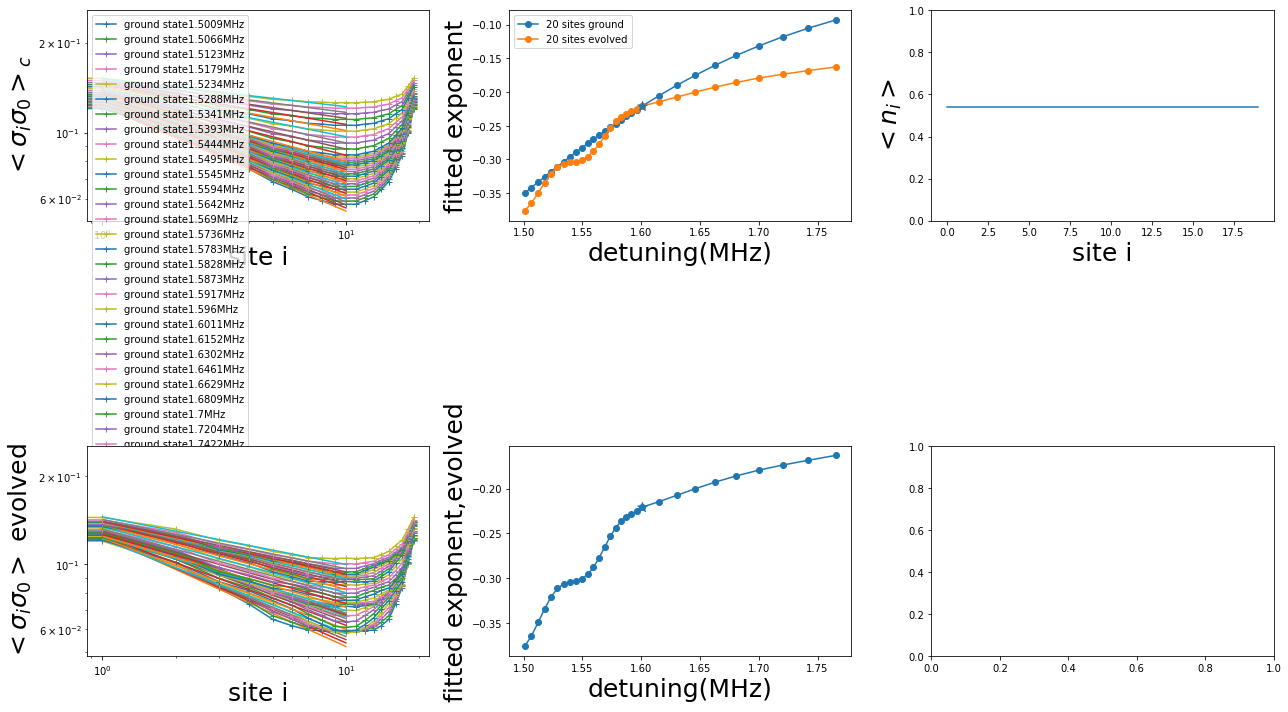

In [30]:
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(18,10))
detuning_list_g = []
exponent_list_g = []
exponent_list = []
for t_id in range(crit_id0-20,crit_id0+10,1):
    ax[0,0].plot(x,sigma2_g[t_id],label='ground state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+')
    ax[1,0].plot(x,sigma2[t_id],label='evolved state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+')

    detuning_list_g.append(data[1,t_id])
    # define the power law function
    fit_range = 9
    # define the data points
    xdata = np.arange(1,fit_range)
    ydata = sigma2[t_id,1:fit_range]

    ydata_g = sigma2_g[t_id,1:fit_range]
    # fit the power law to the data
    params, params_covariance = curve_fit(power_law, xdata, ydata)

    params_g, params_covariance_g = curve_fit(power_law, xdata, ydata_g)
    # evaluate the fitted power law function and plot it
    xfit = np.linspace(1, fit_range+1, 100)
    yfit = power_law(xfit, params[0], params[1])
    exponent_list.append(params[1])

    yfit_g = power_law(xfit, params_g[0], params_g[1])
    exponent_list_g.append(params_g[1])
    ax[0,0].plot(xfit, yfit_g, '-')
    ax[1,0].plot(xfit, yfit, '-')

    if t_id == crit_id0:
        ax[0,1].scatter(data[1,t_id],params_g[1],s=100,color = 'C0',marker = '*',zorder = 2)
        ax[1,1].scatter(data[1,t_id],params[1],s=100,color = 'C0',marker = '*',zorder = 2)

ax[0,1].plot(detuning_list_g,exponent_list_g,marker = 'o',color = 'C0',zorder =1,label = '20 sites ground')
ax[1,1].plot(detuning_list_g,exponent_list,marker = 'o',color = 'C0',zorder =1,label = '20 sites evolved')
ax[0,1].plot(detuning_list_g,exponent_list,marker = 'o',color = 'C1',zorder =1,label = '20 sites evolved')

ax[0,1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[0,1].set_ylabel('fitted exponent',fontsize = 25)
ax[0,1].legend()

ax[0,0].legend()


ax[1,0].set_xlabel('site i',fontsize = 25)
ax[1,0].set_ylabel('$<\sigma_i\sigma_0>$ evolved',fontsize = 25)
ax[1,1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[1,1].set_ylabel('fitted exponent,evolved',fontsize = 25)

ax[0,0].set_xlabel('site i',fontsize = 25)
ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
ax[0,2].plot(np.arange(0,N),n_g)
ax[0,2].set_ylim([0,1])
ax[0,2].set_xlabel('site i',fontsize = 25)
ax[0,2].set_ylabel('$<n_i>$',fontsize = 25)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')    
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')  
fig.tight_layout()
#plt.suptitle('ground state',fontsize=25,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)